In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


## Imports

In [ ]:
import scipy.io as sio
import pandas as pd
import numpy as np
import os
import glob
from natsort import natsorted
import matplotlib.pyplot as plt
import math

## Clone Github 
<!-- https://github.com/seermedical/seer-py.git -->

In [ ]:
# !git clone https://github.com/seermedical/seer-py.git

Cloning into 'seer-py'...
remote: Enumerating objects: 3322, done.
remote: Counting objects: 100% (466/466), done.
remote: Compressing objects: 100% (303/303), done.
remote: Total 3322 (delta 296), reused 283 (delta 163), pack-reused 2856
Receiving objects: 100% (3322/3322), 1.23 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (2203/2203), done.


## Install the seer-py module

In [ ]:
# !pip install /content/drive/MyDrive/seer-py

Processing ./drive/MyDrive/seer-py
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for seerpy: filename=seerpy-0.6.2-py3-none-any.whl size=37798 sha256=50544d0f58b4b54d38f589f8410609ff5c6c90b66c12c84599420bf6c7415a5e
  Stored in directory: /root/.cache/pip/wheels/5b/03/e1/8f7c5151056656a27c5b43f31e00c724db57942b358e46731d
Successfully built seerpy
  Attempting uninstall: seerpy
    Found existing installation: seerpy 0.6.2
    Uninstalling seerpy-0.6.2:
      Successfully uninstalled seerpy-0.6.2


## Load data 

In [ ]:
# user
# vei2102@columbia.edu

# pass
# mW2Fc88BrMqpua9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load as .mat

In [ ]:
n_files2unzip = 120#(216+825+1002+2058+690+2163)*(1/3)

print(str(n_files2unzip)+' .mat files will take this time to unzip:')
print(str(math.floor(((73/216) * n_files2unzip) / 60))+' min')
print(str(int(round((((73/216) * n_files2unzip) / 60 - math.floor(((73/216) * n_files2unzip) / 60))*60,0)))+' sec')
print()
print('and about this space on disk:')
print(str(round(n_files2unzip*15_360_184/1024/1024/1024,2))+' GB')
print()
#print('when converted to a dataframe and saved to a pickle about this space on disk:')
#print(str(round(((231.1/1024)/12)*n_files2unzip,2))+' GB')

120 .mat files will take this time to unzip:
0 min
41 sec

and about this space on disk:
1.72 GB



In [ ]:
study = 'Pat3Test'
!zip -FF "/content/drive/MyDrive/data/"$study".zip" -O "/content/drive/MyDrive/data/"$study".fixed.zip"

Fix archive (-FF) - salvage what can
 Found end record (EOCDR) - says expect single disk archive
Scanning for entries...
 copying: Pat3Train/Pat3Train_1_0.mat  (4179853 bytes)
 copying: Pat3Train/Pat3Train_1_1.mat  (4503944 bytes)
 copying: Pat3Train/Pat3Train_10_0.mat  (4514255 bytes)
 copying: Pat3Train/Pat3Train_10_1.mat  (4270234 bytes)
 copying: Pat3Train/Pat3Train_100_0.mat  (4280881 bytes)
 copying: Pat3Train/Pat3Train_100_1.mat  (4805667 bytes)
 copying: Pat3Train/Pat3Train_1003_1.mat  (4946889 bytes)
 copying: Pat3Train/Pat3Train_1007_1.mat  (4283438 bytes)
 copying: Pat3Train/Pat3Train_101_0.mat  (4253481 bytes)
 copying: Pat3Train/Pat3Train_101_1.mat  (4896367 bytes)
 copying: Pat3Train/Pat3Train_1015_0.mat  (4849086 bytes)
 copying: Pat3Train/Pat3Train_1016_0.mat  (4829512 bytes)
 copying: Pat3Train/Pat3Train_1017_0.mat  (4829883 bytes)
 copying: Pat3Train/Pat3Train_1018_0.mat  (4893743 bytes)
 copying: Pat3Train/Pat3Train_1019_0.mat  (4934322 bytes)
 copying: Pat3Train/Pat

In [ ]:
study = 'Pat3Test'
!unzip "/content/drive/MyDrive/data/"$study".zip" -d /content/data

## Pat1Test.zip contain 216 files and takes 1 min 13 sec to unzip the 3.08GB
# Pat1Train.zip contain 825 and should take 4 min 39 sec to unzip the 11.8GB
# total size = 14.88GB; total time to unzip = 5 min 52 sec

# Pat2Test.zip contain 1002 and should take 5 min 39 sec to unzip the 14.33GB
# Pat2Train.zip contain 2058 and should take 11 min 36 sec to unzip the 29.44GB
# total size = 43.77GB; total time to unzip = 17 min 14 sec

# Pat3Test.zip contain 690 and should take 3 min 53 sec to unzip the 9.87GB
# Pat3Train.zip contain 2163 and should take 12 min 11 sec to unzip the 30.94GB
# total size = 40.81GB; total time to unzip = 16 min 4 sec

# TOTAL disk needed = 99.48GB, total time to unzip = 39 min 10 sec
# TOTAL disk needed if converted to a dataframe and saved to a pickle = 130.78GB

Archive:  /content/drive/MyDrive/data/Pat3Test.zip
  inflating: /content/data/Pat3Test/Pat3Test_1_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_10_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_100_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_101_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_102_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_103_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_104_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_105_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_106_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_107_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_108_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_109_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_11_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_110_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_111_0.mat  
  inflating: /content/data/Pat3Test/Pat3Test_112_0.mat  
  inflating: /content/data/Pat3Test/Pat3T

In [ ]:
study = 'Pat3Test'

In [ ]:
# !python /content/drive/MyDrive/seer-py/Examples/neurovista_contest_data_downloader.py

2021-08-11 14:57:54,756 Login Successful

Study:  Pat1Train
  Retrieving metadata...
2021-08-11 14:57:59,453 NumExpr defaulting to 2 threads.
  Finished downloading study.                    


# Explore .mat

In [ ]:
# [patient#]_[segment #]_1 == preictal (one hour, 5 minutes before seizure)
# [patient#]_[segment #]_0 == interictal (4 hours away from a seizure)

In [ ]:
data_root = '/content/data/' #'/content/drive/MyDrive/data/'
#data_file = 'Pat1Train_1_1.mat'
header = ['ch0',	'ch1',	'ch2',	'ch3',	'ch4',	'ch5',	'ch6',	'ch7',	'ch8',	'ch9',	'ch10',	'ch11',	'ch12',	'ch13',	'ch14',	'ch15']
studyHeader = ['study', 'segment', 'type']
studyHeader_train = ['study','block_id', 'segment', 'type']
analysis_root = '/content/drive/MyDrive/analysis'

In [ ]:
test_labels = pd.read_csv('/content/drive/MyDrive/labels/contest_test_data_labels_public.csv')
test_labels

,image,class,usage
0,Pat1Test_1_0,0.0,Public
1,Pat1Test_2_0,NaN,Private
2,Pat1Test_3_0,1.0,Public
3,Pat1Test_4_0,NaN,Private
4,Pat1Test_5_0,NaN,Private
...,...,...,...
1903,Pat3Test_686_0,NaN,Private
1904,Pat3Test_687_0,0.0,Public
1905,Pat3Test_688_0,NaN,Private
1906,Pat3Test_689_0,0.0,Public


In [ ]:
test_labels = pd.read_csv('/content/drive/MyDrive/labels/contest_test_data_labels_public.csv')
test_labels_public = test_labels[test_labels['usage']=='Public']
# new data frame with split value columns
new = test_labels_public["image"].str.split("_", n = 2, expand = True)
  
# making separate first name column from new data frame
test_labels_public["patient"]= new[0]
  
# making separate last name column from new data frame
test_labels_public["segment"]= new[1]

test_labels_public["class"] = test_labels_public["class"].astype(int)
test_labels_public = test_labels_public[test_labels_public['patient']==study]

test_labels_public

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,image,class,usage,patient,segment
1221,Pat3Test_4_0,0,Public,Pat3Test,4
1226,Pat3Test_9_0,0,Public,Pat3Test,9
1227,Pat3Test_10_0,0,Public,Pat3Test,10
1231,Pat3Test_14_0,0,Public,Pat3Test,14
1232,Pat3Test_15_0,0,Public,Pat3Test,15
...,...,...,...,...,...
1897,Pat3Test_680_0,0,Public,Pat3Test,680
1901,Pat3Test_684_0,0,Public,Pat3Test,684
1904,Pat3Test_687_0,0,Public,Pat3Test,687
1906,Pat3Test_689_0,0,Public,Pat3Test,689


In [ ]:
selection2unzip = test_labels_public
loadedMatFiles = {}
keys = np.array(selection2unzip['image'])
#values = ["Hi", "I", "am", "John"]
for i in keys:
        loadedMatFiles[i] = sio.loadmat('/content/data/'+study+'/'+i+'.mat')
        loadedMatFiles[i]['__globals__'] = {'study': selection2unzip['patient'][selection2unzip['image']==i].to_string(index=False).strip(),                                  
                                            'segment':int(selection2unzip['segment'][selection2unzip['image']==i].to_string(index=False).strip()),
                                            'type':int(selection2unzip['class'][selection2unzip['image']==i].to_string(index=False).strip())}
print(loadedMatFiles.keys())
print()
loadedMatFiles['Pat2Test_1_0']

dict_keys(['Pat3Test_4_0', 'Pat3Test_9_0', 'Pat3Test_10_0', 'Pat3Test_14_0', 'Pat3Test_15_0', 'Pat3Test_17_0', 'Pat3Test_18_0', 'Pat3Test_21_0', 'Pat3Test_27_0', 'Pat3Test_31_0', 'Pat3Test_34_0', 'Pat3Test_38_0', 'Pat3Test_43_0', 'Pat3Test_46_0', 'Pat3Test_47_0', 'Pat3Test_48_0', 'Pat3Test_50_0', 'Pat3Test_52_0', 'Pat3Test_53_0', 'Pat3Test_56_0', 'Pat3Test_59_0', 'Pat3Test_63_0', 'Pat3Test_71_0', 'Pat3Test_75_0', 'Pat3Test_79_0', 'Pat3Test_82_0', 'Pat3Test_88_0', 'Pat3Test_92_0', 'Pat3Test_93_0', 'Pat3Test_96_0', 'Pat3Test_97_0', 'Pat3Test_98_0', 'Pat3Test_103_0', 'Pat3Test_114_0', 'Pat3Test_117_0', 'Pat3Test_119_0', 'Pat3Test_120_0', 'Pat3Test_125_0', 'Pat3Test_127_0', 'Pat3Test_130_0', 'Pat3Test_138_0', 'Pat3Test_139_0', 'Pat3Test_142_0', 'Pat3Test_149_0', 'Pat3Test_161_0', 'Pat3Test_165_0', 'Pat3Test_166_0', 'Pat3Test_170_0', 'Pat3Test_185_0', 'Pat3Test_194_0', 'Pat3Test_202_0', 'Pat3Test_207_0', 'Pat3Test_208_0', 'Pat3Test_210_0', 'Pat3Test_213_0', 'Pat3Test_214_0', 'Pat3Test_217_0

KeyError: ignored

In [ ]:
loadedMatFiles['Pat3Test_4_0']

{'__globals__': {'segment': 4, 'study': 'Pat3Test', 'type': 0},
 '__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Fri Aug 13 00:35:32 2021',
 '__version__': '1.0',
 'data': array([[   9.366211 ,   11.178955 ,   -7.3518066, ...,   50.455566 ,
           11.984619 ,   -4.867676 ],
        [  22.391113 ,   18.161377 ,   -5.3376465, ...,   47.501465 ,
            8.963379 ,   -4.867676 ],
        [  31.38794  ,   19.168457 ,   -8.358887 , ...,   45.487305 ,
           12.991699 ,   -5.874756 ],
        ...,
        [ -32.596436 ,   -6.7475586,   20.57837  , ..., -108.46411  ,
          -39.91455  ,   13.058838 ],
        [ -31.589355 ,   -8.761719 ,   21.58545  , ...,  -91.47778  ,
          -46.96411  ,   11.044678 ],
        [ -22.59253  ,  -12.7229   ,   22.59253  , ...,  -78.45264  ,
          -55.960938 ,   12.051758 ]], dtype=float32)}

In [ ]:
#Read Test data
Pat1Test_df = pd.DataFrame()
matFiles = data_root+study+'/'+test_labels_public["image"]+'.mat'
for matFilePath in matFiles:
  print(matFilePath)
  loadedMatFile = sio.loadmat(matFilePath)['data']

  file_name = matFilePath.split('/')[-1].split('.')[0]
  file_name_row = test_labels_public[test_labels_public['image'] == file_name]
  newColumns = [file_name_row[['patient','segment','class']].values] * np.shape(loadedMatFile)[0]
  newColumns = np.squeeze(newColumns,axis=1)

  study_df = pd.DataFrame(newColumns, columns=studyHeader)
  mat_df = pd.DataFrame(loadedMatFile, columns=header)
  result = pd.concat([study_df, mat_df], axis=1)
  Pat1Test_df = pd.concat([Pat1Test_df,result])

Pat1Test_df.study = Pat1Test_df.study.astype(str)
Pat1Test_df.segment = Pat1Test_df.segment.astype(int)
Pat1Test_df['type'] = Pat1Test_df['type'].astype(int)

In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/labels/contest_train_data_labels.csv')
train_labels_0 = train_labels[train_labels['class']==0]
#train_labels_0 = train_labels

# new data frame with split value columns
new = train_labels_0["image"].str.split("_", n = 2, expand = True)
  
# making separate first name column from new data frame
train_labels_0["patient"]= new[0]
  
# making separate last name column from new data frame
train_labels_0["segment"]= new[1]

train_labels_0["segment"] = train_labels_0["segment"].astype(int)

train_labels_0["block_id"]= np.ceil(np.array(train_labels_0['segment']/6))
train_labels_0["block_id"] = train_labels_0["block_id"].astype(int)

train_labels_0 = train_labels_0[train_labels_0['patient']==study]
train_labels_0["class"] = train_labels_0["class"].astype(int)

train_labels_0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,image,class,patient,segment,block_id
2884,Pat3Train_1_0,0,Pat3Train,1,1
2885,Pat3Train_2_0,0,Pat3Train,2,1
2886,Pat3Train_3_0,0,Pat3Train,3,1
2887,Pat3Train_4_0,0,Pat3Train,4,1
2888,Pat3Train_5_0,0,Pat3Train,5,1
...,...,...,...,...,...
4787,Pat3Train_2240_0,0,Pat3Train,2240,374
4788,Pat3Train_2241_0,0,Pat3Train,2241,374
4789,Pat3Train_2242_0,0,Pat3Train,2242,374
4790,Pat3Train_2243_0,0,Pat3Train,2243,374


In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/labels/contest_train_data_labels.csv')
train_labels_1 = train_labels[train_labels['class']==1]
#train_labels_1 = train_labels

# new data frame with split value columns
new = train_labels_1["image"].str.split("_", n = 2, expand = True)

# making separate first name column from new data frame
train_labels_1["patient"]= new[0]

# making separate last name column from new data frame
train_labels_1["segment"]= new[1]

train_labels_1["segment"] = train_labels_1["segment"].astype(int)

train_labels_1["block_id"]= np.ceil(np.array(train_labels_1['segment']/6))
train_labels_1["block_id"] = train_labels_1["block_id"].astype(int)

train_labels_1 = train_labels_1[train_labels_1['patient']==study]
train_labels_1["class"] = train_labels_1["class"].astype(int)

train_labels_1['block_id'][train_labels_1['segment']>150] = ""

train_labels_1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,image,class,patient,segment,block_id
4792,Pat3Train_1_1,1,Pat3Train,1,1
4793,Pat3Train_2_1,1,Pat3Train,2,1
4794,Pat3Train_3_1,1,Pat3Train,3,1
4795,Pat3Train_4_1,1,Pat3Train,4,1
4796,Pat3Train_5_1,1,Pat3Train,5,1
...,...,...,...,...,...
5042,Pat3Train_2277_1,1,Pat3Train,2277,
5043,Pat3Train_2298_1,1,Pat3Train,2298,
5044,Pat3Train_2307_1,1,Pat3Train,2307,
5045,Pat3Train_2319_1,1,Pat3Train,2319,


In [ ]:
train_labels_1[145:155]

,image,class,patient,segment,block_id
4937,Pat3Train_146_1,1,Pat3Train,146,25
4938,Pat3Train_147_1,1,Pat3Train,147,25
4939,Pat3Train_148_1,1,Pat3Train,148,25
4940,Pat3Train_149_1,1,Pat3Train,149,25
4941,Pat3Train_150_1,1,Pat3Train,150,25
4942,Pat3Train_154_1,1,Pat3Train,154,
4943,Pat3Train_171_1,1,Pat3Train,171,
4944,Pat3Train_223_1,1,Pat3Train,223,
4945,Pat3Train_232_1,1,Pat3Train,232,
4946,Pat3Train_245_1,1,Pat3Train,245,


In [ ]:
train_labels_0.shape[0]/2

0.0

In [ ]:
np.unique(train_labels_0['block_id'])

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  75,  76,  77,  78,  92,  93,  94,  95, 109, 110,
       111, 112, 113, 114, 115, 123, 124, 125, 126, 127, 128, 137, 138,
       139, 140, 141, 148, 149, 150, 151, 157, 158, 159, 160, 161, 162,
       163, 164, 169, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 187, 188])

In [ ]:
120/6*0.75
#16/(46+16)


15.0

In [ ]:
import random
random.seed(2021)
selected_0_block_ids = random.sample(list(np.unique(train_labels_0['block_id'])), 15)
selected_1_block_ids = random.sample(list(np.unique(train_labels_1['block_id'])), 5)

In [ ]:
train_labels_0_selection = pd.DataFrame()
for i in range(len(selected_0_block_ids)):
  train_labels_0_selection = pd.concat([train_labels_0_selection,train_labels_0[train_labels_0['block_id'] == selected_0_block_ids[i]]])

In [ ]:
train_labels_1_selection = pd.DataFrame()
for i in range(len(selected_1_block_ids)):
  train_labels_1_selection = pd.concat([train_labels_1_selection,train_labels_1[train_labels_1['block_id'] == selected_1_block_ids[i]]])

In [ ]:
!ls /content/drive/MyDrive/analysis/spectograms/train_allavail_stacked | wc -l

6938


In [ ]:
train_labels_all = pd.concat([train_labels_0,train_labels_1])
train_labels_all

,image,class,patient,segment,block_id
2884,Pat3Train_1_0,0,Pat3Train,1,1
2885,Pat3Train_2_0,0,Pat3Train,2,1
2886,Pat3Train_3_0,0,Pat3Train,3,1
2887,Pat3Train_4_0,0,Pat3Train,4,1
2888,Pat3Train_5_0,0,Pat3Train,5,1
...,...,...,...,...,...
5042,Pat3Train_2277_1,1,Pat3Train,2277,
5043,Pat3Train_2298_1,1,Pat3Train,2298,
5044,Pat3Train_2307_1,1,Pat3Train,2307,
5045,Pat3Train_2319_1,1,Pat3Train,2319,


In [ ]:
train_labels_selection = pd.concat([train_labels_0_selection,train_labels_1_selection])
train_labels_selection

,image,class,patient,segment,block_id
306,Pat1Train_655_0,0,Pat1Train,655,110
307,Pat1Train_656_0,0,Pat1Train,656,110
308,Pat1Train_657_0,0,Pat1Train,657,110
309,Pat1Train_658_0,0,Pat1Train,658,110
310,Pat1Train_659_0,0,Pat1Train,659,110
...,...,...,...,...,...
697,Pat1Train_128_1,1,Pat1Train,128,22
698,Pat1Train_129_1,1,Pat1Train,129,22
699,Pat1Train_130_1,1,Pat1Train,130,22
700,Pat1Train_131_1,1,Pat1Train,131,22


In [ ]:
import subprocess
selection2unzip = train_labels_all
zipfile='Pat1Train.zip'
seg = np.array(selection2unzip['segment'])
ict = np.array(selection2unzip['class'])
for i in range(len(selection2unzip)):
  #print('*/*'+str(seg[i])+'_'+str(ict[i])+'.mat')
  subprocess.call(['unzip', '/content/drive/MyDrive/data/'+zipfile, '*/*'+str(seg[i])+'_'+str(ict[i])+'.mat', '-d', '/content/data'])

In [ ]:
keys = np.array(selection2unzip['image'])
keys[0:3]

array(['Pat1Train_7_0', 'Pat1Train_8_0', 'Pat1Train_9_0'], dtype=object)

In [ ]:
selection2unzip = train_labels_all.iloc[int(2163/3)*2:]
#print(selection2unzip[selection2unzip["image"]=="Pat1Train_366_1"])
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_29_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_43_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_104_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_135_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_1105_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_1146_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_2267_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_2287_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_2326_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_2337_1"]
# selection2unzip = selection2unzip[selection2unzip["image"]!="Pat2Train_2369_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2235_0"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_277_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_401_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_481_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2256_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2258_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2277_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2298_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2307_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2319_1"]
selection2unzip = selection2unzip[selection2unzip["image"]!="Pat3Train_2395_1"]

selection2unzip

,image,class,patient,segment,block_id
4326,Pat3Train_1743_0,0,Pat3Train,1743,291
4327,Pat3Train_1744_0,0,Pat3Train,1744,291
4328,Pat3Train_1745_0,0,Pat3Train,1745,291
4329,Pat3Train_1746_0,0,Pat3Train,1746,291
4330,Pat3Train_1747_0,0,Pat3Train,1747,292
...,...,...,...,...,...
5035,Pat3Train_2122_1,1,Pat3Train,2122,
5036,Pat3Train_2131_1,1,Pat3Train,2131,
5037,Pat3Train_2189_1,1,Pat3Train,2189,
5038,Pat3Train_2190_1,1,Pat3Train,2190,


In [ ]:
#file2unzip='1009_0'
#!unzip /content/drive/MyDrive/data/Pat1Train.zip '*/*'$file2unzip'.mat' -d /content/data
loadedMatFiles = {}
keys = np.array(selection2unzip['image'])
#values = ["Hi", "I", "am", "John"]
for i in keys:
        loadedMatFiles[i] = sio.loadmat('/content/data/'+study+'/'+i+'.mat')
        loadedMatFiles[i]['__globals__'] = {'study': selection2unzip['patient'][selection2unzip['image']==i].to_string(index=False).strip(),
                                            'block_id':selection2unzip['block_id'][selection2unzip['image']==i].to_string(index=False).strip(),
                                            'segment':int(selection2unzip['segment'][selection2unzip['image']==i].to_string(index=False).strip()),
                                            'type':int(selection2unzip['class'][selection2unzip['image']==i].to_string(index=False).strip())}

#loadedMatFile = sio.loadmat('/content/data/Pat1Train/Pat1Train_'+file2unzip+'.mat')
#loadedMatFile['__globals__'] = {'study': train_labels_selection['patient'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip(),
#                                'block_id':int(train_labels_selection['block_id'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip()),
#                                'segment':int(train_labels_selection['segment'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip()),
 #                               'type':int(train_labels_selection['class'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip())}
#loadedMatFile

In [ ]:
print(loadedMatFiles.keys())
#loadedMatFiles['Pat1Train_6_1']['data'].shape

dict_keys(['Pat3Train_1743_0', 'Pat3Train_1744_0', 'Pat3Train_1745_0', 'Pat3Train_1746_0', 'Pat3Train_1747_0', 'Pat3Train_1748_0', 'Pat3Train_1749_0', 'Pat3Train_1750_0', 'Pat3Train_1751_0', 'Pat3Train_1752_0', 'Pat3Train_1759_0', 'Pat3Train_1760_0', 'Pat3Train_1761_0', 'Pat3Train_1762_0', 'Pat3Train_1763_0', 'Pat3Train_1764_0', 'Pat3Train_1765_0', 'Pat3Train_1766_0', 'Pat3Train_1767_0', 'Pat3Train_1768_0', 'Pat3Train_1769_0', 'Pat3Train_1770_0', 'Pat3Train_1771_0', 'Pat3Train_1772_0', 'Pat3Train_1773_0', 'Pat3Train_1774_0', 'Pat3Train_1775_0', 'Pat3Train_1776_0', 'Pat3Train_1777_0', 'Pat3Train_1778_0', 'Pat3Train_1779_0', 'Pat3Train_1780_0', 'Pat3Train_1781_0', 'Pat3Train_1782_0', 'Pat3Train_1783_0', 'Pat3Train_1784_0', 'Pat3Train_1785_0', 'Pat3Train_1786_0', 'Pat3Train_1787_0', 'Pat3Train_1788_0', 'Pat3Train_1789_0', 'Pat3Train_1790_0', 'Pat3Train_1791_0', 'Pat3Train_1792_0', 'Pat3Train_1793_0', 'Pat3Train_1794_0', 'Pat3Train_1795_0', 'Pat3Train_1796_0', 'Pat3Train_1797_0', 'Pat3Trai

In [ ]:
file2unzip='1027_0'
!unzip /content/drive/MyDrive/data/Pat1Train.zip '*/*'$file2unzip'.mat' -d /content/data
loadedMatFile2 = sio.loadmat('/content/data/Pat1Train/Pat1Train_'+file2unzip+'.mat')
loadedMatFile2['__globals__'] = {'study': train_labels_selection['patient'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip(),
                                'block_id':int(train_labels_selection['block_id'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip()),
                                'segment':int(train_labels_selection['segment'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip()),
                                'type':int(train_labels_selection['class'][train_labels_selection['image']=='Pat1Train_'+file2unzip].to_string(index=False).strip())}

concatMats={'Pat1Train_1009_0':loadedMatFile,
            'Pat1Train_1027_0':loadedMatFile2}
concatMats

{'Pat1Train_1009_0': {'__globals__': {'block_id': 169,
   'segment': 1009,
   'study': 'Pat1Train',
   'type': 0},
  '__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Aug 11 09:11:05 2021',
  '__version__': '1.0',
  'data': array([[ -83.48828  , -106.718506 ,  -37.229004 , ...,   23.801025 ,
            38.773193 ,   47.031494 ],
         [ -89.53076  , -108.66553  ,  -39.176025 , ...,   24.808105 ,
            44.74878  ,   50.052734 ],
         [ -90.53784  , -110.67969  ,  -47.232666 , ...,   25.81543  ,
            46.76294  ,   51.059814 ],
         ...,
         [  -1.5107422,  -87.71802  ,  -81.20532  , ...,  -11.111572 ,
            60.728027 ,   55.020996 ],
         [  -9.500244 ,  -88.7251   ,  -86.17383  , ...,   -9.164551 ,
            64.75635  ,   57.035156 ],
         [ -11.514404 ,  -82.68262  ,  -85.23389  , ...,   -7.1503906,
            67.77759  ,   56.028076 ]], dtype=float32)},
 'Pat1Train_1027_0': {'__globals__': {'block_id': 172,
   'segment': 1

In [ ]:
# In case we decide to make a lot of pickles but probably not ideal: RAM runs out
train_labels_0_array = np.array(train_labels_0['segment'])
idx=119
print(train_labels_0_array[idx])
block_index = train_labels_0_array[idx]/6
print(block_index)
train_labels_0_part1 = train_labels_0[0:idx+1]
#train_labels_0_part2 = train_labels_0[idx+1:]
#train_labels_0_part3 = train_labels_0[(idx+1)*2:]

126
21.0


In [ ]:
#Read Train data
Pat1Train_df = pd.DataFrame()
part_to_pickle = train_labels_selection
matFiles = data_root+study+'/'+part_to_pickle["image"]+'.mat'
for matFilePath in matFiles:
  print(matFilePath)
  loadedMatFile = sio.loadmat(matFilePath)['data']

  file_name = matFilePath.split('/')[-1].split('.')[0]
  file_name_row = part_to_pickle[part_to_pickle['image'] == file_name]
  newColumns = [file_name_row[['patient','block_id','segment','class']].values] * np.shape(loadedMatFile)[0]
  newColumns = np.squeeze(newColumns,axis=1)

  study_df = pd.DataFrame(newColumns, columns=studyHeader_train)
  mat_df = pd.DataFrame(loadedMatFile, columns=header)
  result = pd.concat([study_df, mat_df], axis=1)
  Pat1Train_df = pd.concat([Pat1Train_df,result])

Pat1Train_df.study = Pat1Train_df.study.astype(str)
Pat1Train_df.segment = Pat1Train_df.segment.astype(int)
Pat1Train_df['type'] = Pat1Train_df['type'].astype(int)

/content/data/Pat1Train/Pat1Train_655_0.mat
/content/data/Pat1Train/Pat1Train_656_0.mat
/content/data/Pat1Train/Pat1Train_657_0.mat
/content/data/Pat1Train/Pat1Train_658_0.mat
/content/data/Pat1Train/Pat1Train_659_0.mat
/content/data/Pat1Train/Pat1Train_660_0.mat
/content/data/Pat1Train/Pat1Train_1009_0.mat
/content/data/Pat1Train/Pat1Train_1010_0.mat
/content/data/Pat1Train/Pat1Train_1011_0.mat
/content/data/Pat1Train/Pat1Train_1012_0.mat
/content/data/Pat1Train/Pat1Train_1013_0.mat
/content/data/Pat1Train/Pat1Train_1014_0.mat
/content/data/Pat1Train/Pat1Train_889_0.mat
/content/data/Pat1Train/Pat1Train_890_0.mat
/content/data/Pat1Train/Pat1Train_891_0.mat
/content/data/Pat1Train/Pat1Train_892_0.mat
/content/data/Pat1Train/Pat1Train_893_0.mat
/content/data/Pat1Train/Pat1Train_894_0.mat
/content/data/Pat1Train/Pat1Train_355_0.mat
/content/data/Pat1Train/Pat1Train_356_0.mat
/content/data/Pat1Train/Pat1Train_357_0.mat
/content/data/Pat1Train/Pat1Train_358_0.mat
/content/data/Pat1Train/Pa

In [ ]:
#dicontinued code from Dolu, because RAM ran out and I had to sort and divide by parts big data frames
#Read Train data

#Pat1Train_df = pd.DataFrame()
#matFiles = glob.glob(os.path.join(data_root,study,'*.mat'))
#matFiles = natsorted(matFiles)
#for matFilePath in matFiles:
#  print(matFilePath)
#  loadedMatFile = sio.loadmat(matFilePath)['data']
#  newColumns = [matFilePath.split('/')[-1].split('.')[0].split('_')] * np.shape(loadedMatFile)[0]
#  study_df = pd.DataFrame(newColumns, columns=studyHeader)
#  mat_df = pd.DataFrame(loadedMatFile, columns=header)
#  result = pd.concat([study_df, mat_df], axis=1)
#  Pat1Train_df = pd.concat([Pat1Train_df,result])

In [ ]:
Pat1Train_df.head(5)

NameError: ignored

Save to analysis folder

In [ ]:
# Save test dataframe as pickle
Pat1Test_df.to_pickle(analysis_root+"/Pat1Test_df.pkl")

In [ ]:
# Save train dataframe as pickle
Pat1Train_df.to_pickle(analysis_root+"/Pat1Train_df_random120segments.pkl")

In [ ]:
# Save test dictionary as pickle
import pickle
a_file = open(analysis_root+"/Pat3Test_dict.pkl", "wb")
pickle.dump(loadedMatFiles, a_file)
a_file.close()

In [ ]:
# Save train dictionary as pickle
import pickle
a_file = open(analysis_root+"/Pat3Train_dict_part3.pkl", "wb")
pickle.dump(loadedMatFiles, a_file)
a_file.close()

In [ ]:
# Load train dictionary picklefile
a_file = open(analysis_root+"/Pat1Train_dict.pkl", "rb")
output = pickle.load(a_file)

In [ ]:
del loadedMatFiles

In [ ]:
!gzip /content/drive/MyDrive/analysis/Pat1Train_dict_allavail.pkl

In [ ]:
!gzip -kd /content/drive/MyDrive/analysis/Pat1Train_dict.pkl.gz

Read dataframe from analysis folder

In [ ]:
# Read test pickle file
test_unpickled_df = pd.read_pickle(analysis_root+"/Pat1Test_df.pkl")
test_unpickled_df.head(3)

NameError: ignored

In [ ]:
#test_unpickled_df[['ch0','ch1','ch2']].plot()

In [ ]:
unpickled_df = pd.read_pickle(analysis_root+"/Pat1Train_df_random120segments.pkl")
unpickled_df.head(3)

,study,block_id,segment,type,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15
0,Pat1Train,110,655,0,-18.094238,39.578857,25.076660,20.04126,4.464844,-11.447266,-17.624268,-17.288574,1.040527,-15.610107,12.790283,-16.080078,-13.864502,-9.433105,15.475830,-3.591797
1,Pat1Train,110,655,0,-12.118652,36.624756,30.045166,17.02002,2.517578,-13.461670,-15.610107,-13.260254,-4.934814,-18.631348,12.790283,-16.080078,-9.835938,-6.411865,3.524902,1.309082
2,Pat1Train,110,655,0,-9.097412,35.617676,39.041748,19.03418,-1.443359,-16.415771,-9.634521,-15.274414,-5.941895,-15.610107,8.829102,-16.080078,-10.843018,-4.464844,-1.443359,3.323242


Plot time domain

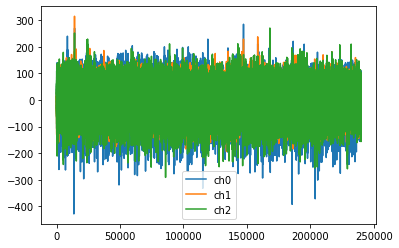

In [ ]:
unpickled_df[['ch0','ch1','ch2']].plot()